# OVERVIEW



Algarve resort and Lisbon City Hotel are 2 hotels located in Portugal. The two hotels wish to find out the most popular time of year that hotel rooms are booked, so they can adequately plan themselves in terms of supplies and staffing. This will ensure that they are able to cater to their guests more efficiently.





# IMPORTING LIBRARIES

In [92]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# LOADING DATASET 

In [93]:
# Loading the datasets
names = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotel_df = pd.read_csv('hotel_bookings.csv', usecols=names)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# CHECKING THE DATA

In [94]:
# Determing the number of records in our dataset
hotel_df.shape

(119390, 32)

In [95]:
# Previewing the first records of our dataset
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [96]:
# Previewing the last records of our dataset
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [97]:
#consice summary of train dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**observation**: our datset has 119390 observations and 32 variables, it has 4 floats, 16int and 12 object datatype.

In [98]:
# checking the target variable
hotel_df.is_canceled.value_counts() 

0    75166
1    44224
Name: is_canceled, dtype: int64

In [99]:
#getting the above in parcentage
#
hotel_df.is_canceled.value_counts() / len(hotel_df) * 100 

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

Tidying the data




In [100]:
#creating a copy of the dataset to be be used on cleaning process
hotel_df1=hotel_df.copy()
#
#getting the irrelevant varaibles
columns = ['arrival_date_year','agent','arrival_date_week_number','lead_time', 'market_segment', 'distribution_channel','booking_changes','days_in_waiting_list', 'adr','reservation_status_date']
#
#dropping the irrelevant colunms
drop_colunms= hotel_df1.drop(columns, axis = 1, inplace=True)
#
#previewing the dataset
hotel_df1.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,July,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0,0,Check-Out
1,Resort Hotel,0,July,1,0,0,2,0.0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0,0,Check-Out
2,Resort Hotel,0,July,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,C,No Deposit,NaN,Transient,0,0,Check-Out
3,Resort Hotel,0,July,1,0,1,1,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0,0,Check-Out
4,Resort Hotel,0,July,1,0,2,2,0.0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0,1,Check-Out


In [101]:
# Check for missing values
#
hotel_df1.isnull().sum()

hotel                                  0
is_canceled                            0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
deposit_type                           0
company                           112593
customer_type                          0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
dtype: int64

In [102]:
#getting the percentage of missing data in each column
#
hotel_df1.isnull().sum()/len(hotel_df1)* 100 



hotel                              0.000000
is_canceled                        0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
deposit_type                       0.000000
company                           94.306893
customer_type                      0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
dtype: float64

In [103]:
# as a role of thumb, drop any colunm with more than 25% of the missing data.
#
hotel_df1 = hotel_df1[hotel_df1.columns[hotel_df1.isnull().mean() < 0.25]]
hotel_df1.shape

(119390, 21)

In [104]:
hotel_df1.isnull().sum()

hotel                               0
is_canceled                         0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
deposit_type                        0
customer_type                       0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
dtype: int64

**observation**: the data type are appropriate now and there is a clue that we have null values.

In [105]:
#filling the missing values of children variable with the mean
#
hotel_df1['children']= hotel_df1['children'].fillna(hotel_df1['children'].mean(), axis = 0)

In [106]:
#filling the missing values in the country variable with mode
#
hotel_df1.fillna({'country': hotel_df1['country'].mode()[0]}, inplace=True)

In [107]:
hotel_df1.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [108]:
#confriming no missing values.
#
hotel_df1.isnull().sum().any()

False

In [109]:
# Checking if there are duplicates
#
hotel_df1.duplicated().sum()

38125

In [110]:
# Dropping duplicates
hotel_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
hotel_df1.duplicated().any()

False

In [111]:
#To remove white spaces in our columns
hotel_df1.columns.str.replace(" "," ")

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

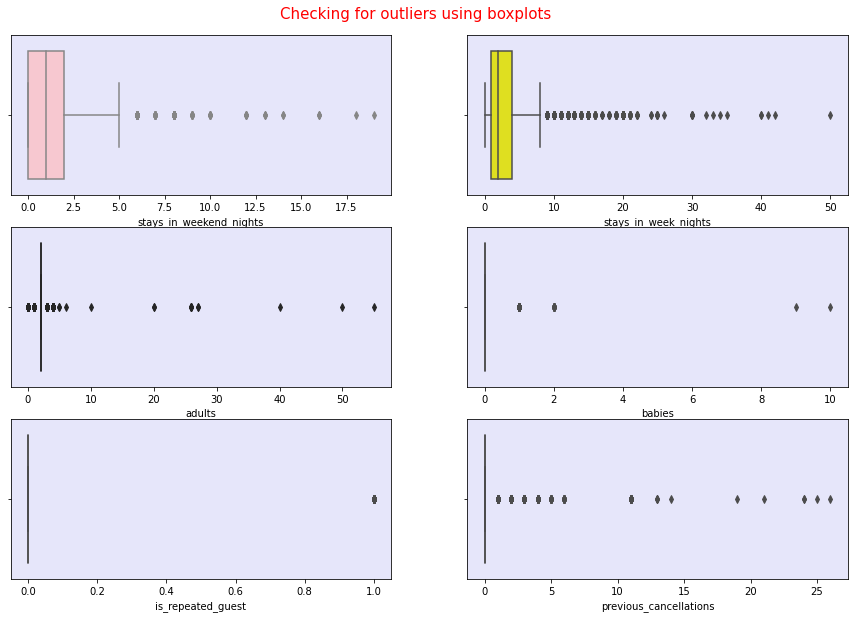

In [112]:
# Using a boxplot to check for outliers

# Creating a list of columns to check for outliers
# Creating a list of colors

import seaborn as sns

cols = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']
colors = ['pink', 'yellow', 'green', 'fuchsia', 'red', 'orange']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), hotel_df1, cols, colors):
  sns.boxplot(hotel_df1[column], ax = ax, color = color)
  ax.set_facecolor('lavender')
  
# Setting the background color to lavender
# The boxplots above indicate the extent of outliers in each of the above columns

In [113]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = hotel_df1.quantile(0.25)
Q3 = hotel_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                        1.0
arrival_date_day_of_month         15.0
stays_in_weekend_nights            2.0
stays_in_week_nights               3.0
adults                             0.0
children                           0.0
babies                             0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
required_car_parking_spaces        0.0
total_of_special_requests          1.0
dtype: float64


In [114]:
# We then get the outliers as follows:
# True means presence of outliers

(hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))

,adults,arrival_date_day_of_month,arrival_date_month,assigned_room_type,babies,children,country,customer_type,deposit_type,hotel,is_canceled,is_repeated_guest,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119386,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
# We then filter out outliers and remain with valid values as follows

df_clean = hotel_df1[~((hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(43962, 21)

**observation**: clean dataset has 43962 records and 21 variables.

In [116]:
#converting the data to the correct datatype- float
#
df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests" ]] = df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests"]].astype(float)
#

#converting categorical variables to the correct datatype-category
#
df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status" ]] = df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status"]].astype('category')

In [117]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           43962 non-null  category
 1   is_canceled                     43962 non-null  float64 
 2   arrival_date_month              43962 non-null  category
 3   arrival_date_day_of_month       43962 non-null  float64 
 4   stays_in_weekend_nights         43962 non-null  float64 
 5   stays_in_week_nights            43962 non-null  int64   
 6   adults                          43962 non-null  float64 
 7   children                        43962 non-null  float64 
 8   babies                          43962 non-null  int64   
 9   meal                            43962 non-null  category
 10  country                         43962 non-null  category
 11  is_repeated_guest               43962 non-null  int64   
 12  previous_cancella

##6. Exploratory Data Analysis

## 6a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.






In [118]:
# preview of our dataset
#
df_clean.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0.0,July,1.0,0.0,0,2.0,0.0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,BB,GBR,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Check-Out
6,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
7,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0.0,0,FB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,1.0,Check-Out
8,Resort Hotel,1.0,July,1.0,0.0,3,2.0,0.0,0,BB,PRT,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Canceled


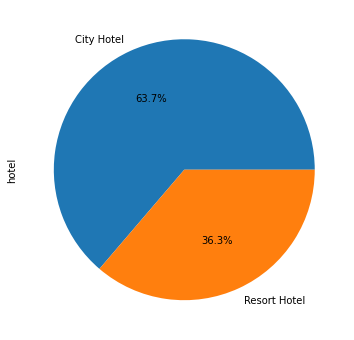

In [119]:
#univariate analysis: hotel variable piechart
#
plt.figure(figsize = (6, 6))
df_clean.hotel.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

**observation**: city hotel registered a higher reservation of 63.7%

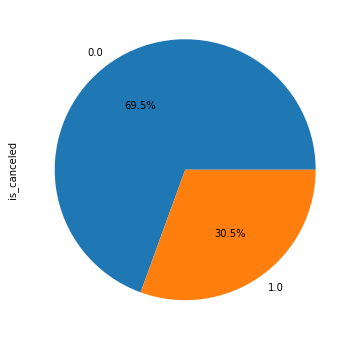

In [120]:
#univariate analysis: is cancelled variable piechart
#
plt.figure(figsize = (6, 6))
df_clean.is_canceled.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

#0=> not cancelled
#1=> cancelled

**observation**: only 31% of reversation was cancelled.

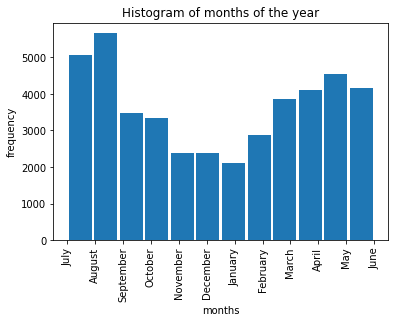

In [121]:
# univariate analysis: month of arrival variable histogram
#
plt.hist(df_clean['arrival_date_month'], bins=12, histtype='bar', rwidth=0.9)
plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Histogram of months of the year') 
plt.show()

**observation**: The most popular months of travel were between May and August with the peak being recorded at August.

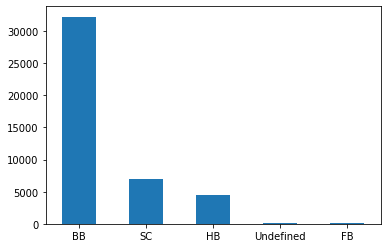

In [122]:
# univariate analysis: meal variable bar graph
df_clean.meal.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: many guests went for bed and breakfast option.

**observation**: Most of the hotel guests came from Portugal and Great Britain.

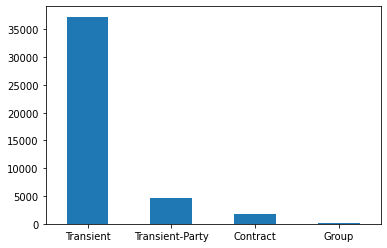

In [123]:
# univariate analysis: customer type variable bar graph
df_clean.customer_type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**:The most frequent type of guest was the transient.

**observation**: Most popular arrival dates for customers is 17th and  2nd early of the month mostly because that's when people get their salaries

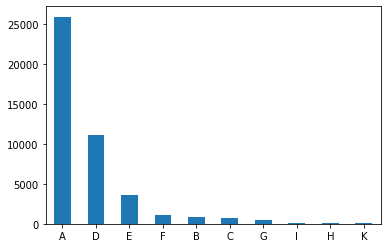

In [124]:
# univariate analysis: room type variable bar graph
df_clean.assigned_room_type.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: most of the clients went for romm type A

## Observations from Univariate Analysis
1. Guests preferred the city hotels to the resort hotels
2. Most guests went for the Bed and Break fast option while the Full board option had the least customers
3.Most of the hotel guests came from Portugal and Great Britain while very few came from Germany
4.The most frequent type of guest was the transient type who came for a short term visit while the group type of guests were the least
5.The most popular months of travel were between May and August with the peak being recorded at July mainly because it is summer in Europe during these months
6.Most popular arrival dates for customers is during end month mostly because that's when people get their salaries 
7.The most popular room type both for bookings and reservations is Type A while the least popular L

# Bivariate Analysis 

### Bar Charts to show the relationship between booking cancellation status and other variables

In [125]:
df_clean['is_canceled'].value_counts()

# 0 = not canceled
# 1 = canceled

0.0    30532
1.0    13430
Name: is_canceled, dtype: int64

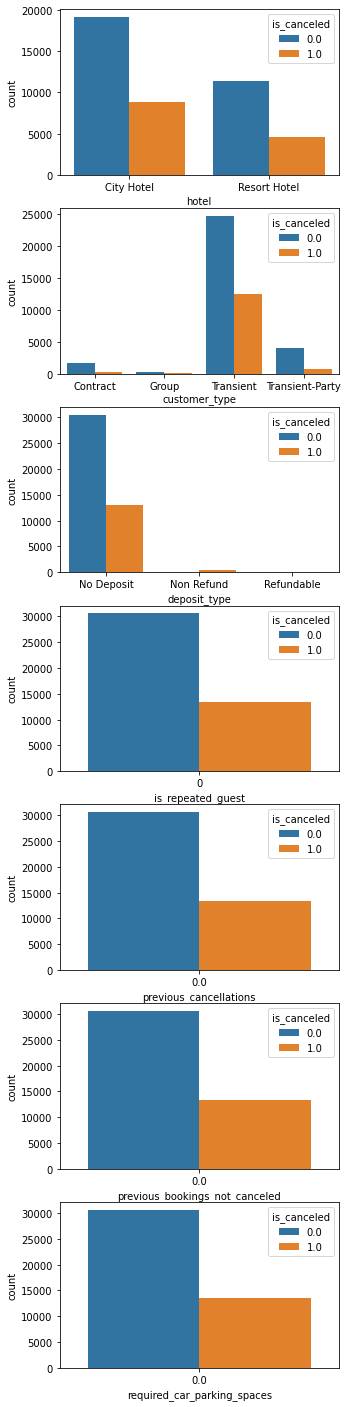

In [126]:
#plotting the target variable against other features.


f, axes = plt.subplots(7, 1, figsize=[5, 25])

sns.countplot('hotel', hue= 'is_canceled', data=df_clean, ax=axes[0])
sns.countplot('customer_type', hue= 'is_canceled', data=df_clean, ax=axes[1])
sns.countplot('deposit_type', hue= 'is_canceled', data=df_clean, ax=axes[2])
sns.countplot('is_repeated_guest', hue= 'is_canceled', data=df_clean, ax=axes[3])
sns.countplot('previous_cancellations', hue= 'is_canceled', data=df_clean, ax=axes[4])
sns.countplot('previous_bookings_not_canceled', hue= 'is_canceled', data=df_clean, ax=axes[5])
sns.countplot('required_car_parking_spaces', hue= 'is_canceled', data=df_clean, ax=axes[6])

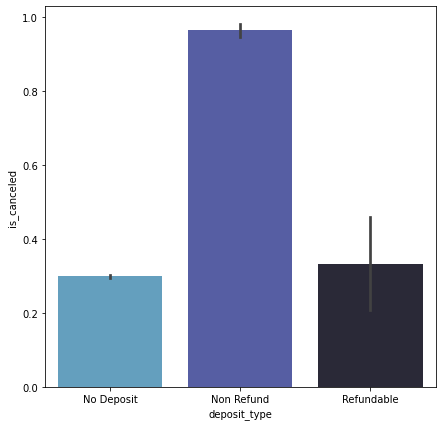

In [127]:
#Distribution of cancellation and Deposit Type¶

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['deposit_type'], y=df_clean['is_canceled'], palette=sns.color_palette("icefire"))

#It Seems more bookings were non refundable and were cancelled more as well

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

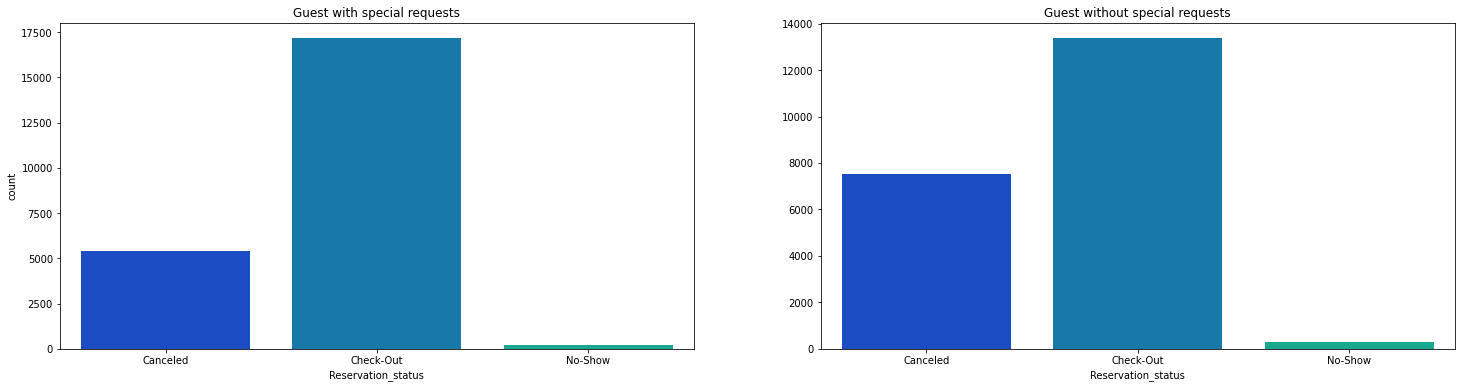

In [128]:
# Special and non Special Request of the guest
fig, ax = plt.subplots(1, 2, figsize=[25, 6])

special = df_clean[df_clean.total_of_special_requests != 0]
non_special = df_clean[df_clean.total_of_special_requests == 0]
special

# Plots
spec = sns.countplot(special.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

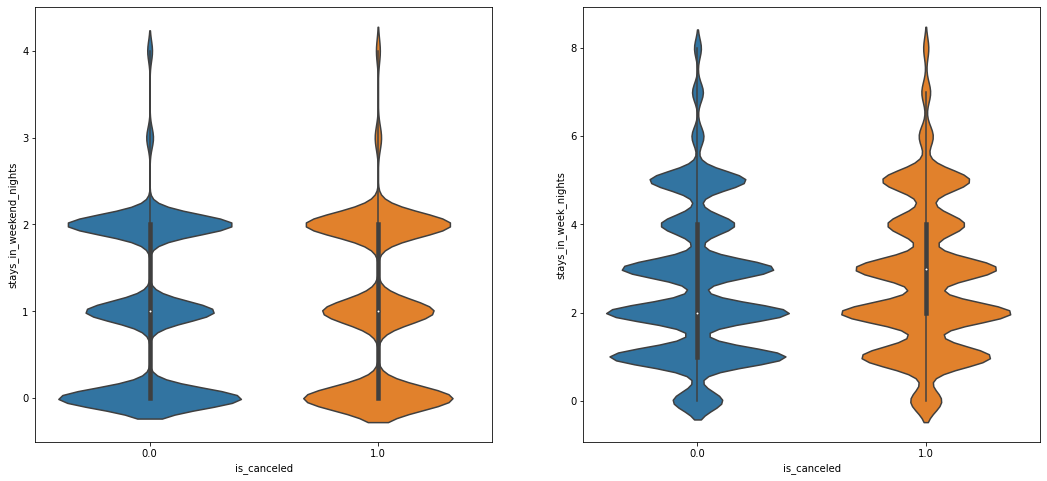

In [129]:
#Stays in weekend Nights and Week Nights for Cancelled and non cancelled bookings

fig, ax = plt.subplots(1, 2, figsize=[18, 8])

sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_weekend_nights"], ax = ax[0] )
sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_week_nights"], ax = ax[1] )

In [130]:
#sns.pairplot(df_clean,kind="scatter", diag_kind="kde", hue="is_canceled")

In [131]:
# Computing the correlation matrix 
#
# This is the association between numerical variables in the dataset
#

## Observations from the Bivariate Analysis
1. We see that it is more likely for customers from the city hotel to cancel their booking than the ones from the resort hotel

2. For customer type, the transient customers were most likely to cancel while groups cancelled least

3. We also saw that the guests who put no deposit were very likely to cancel because they had nothing to lose while the ones who put a refundable deposit didn't cancel at all 

4. The bivariate analysis also shows that it was by far less likely for repeated guests to cancel compared to their new counterparts


In [132]:
df_clean2=df_clean.copy()


In [133]:
# Label encoding to change our categorical variables to numerical to be able to create our correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df_clean['hotel'] = en.fit_transform(df_clean['hotel'])
df_clean['arrival_date_month'] = en.fit_transform(df_clean['arrival_date_month'])
df_clean['country'] = en.fit_transform(df_clean['country'])
df_clean['meal'] = en.fit_transform(df_clean['meal'])
df_clean['reserved_room_type'] = en.fit_transform(df_clean['reserved_room_type'])
df_clean['assigned_room_type'] = en.fit_transform(df_clean['assigned_room_type'])
df_clean['deposit_type'] = en.fit_transform(df_clean['deposit_type'])
df_clean['customer_type'] = en.fit_transform(df_clean['customer_type'])
df_clean['reservation_status'] = en.fit_transform(df_clean['reservation_status'])
df_clean

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0.0,5,1.0,0.0,0,2.0,0.0,0,0,121,0,0.0,0.0,2,2,0,2,0.0,0.0,1
4,1,0.0,5,1.0,0.0,2,2.0,0.0,0,0,51,0,0.0,0.0,0,0,0,2,0.0,1.0,1
6,1,0.0,5,1.0,0.0,2,2.0,0.0,0,0,121,0,0.0,0.0,2,2,0,2,0.0,0.0,1
7,1,0.0,5,1.0,0.0,2,2.0,0.0,0,1,121,0,0.0,0.0,2,2,0,2,0.0,1.0,1
8,1,1.0,5,1.0,0.0,3,2.0,0.0,0,0,121,0,0.0,0.0,0,0,0,2,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,0.0,1,31.0,2.0,4,2.0,0.0,0,0,38,0,0.0,0.0,0,0,0,2,0.0,0.0,1
119384,0,0.0,1,30.0,2.0,5,2.0,0.0,0,0,13,0,0.0,0.0,0,0,0,2,0.0,2.0,1
119385,0,0.0,1,30.0,2.0,5,2.0,0.0,0,0,13,0,0.0,0.0,0,0,0,2,0.0,0.0,1
119388,0,0.0,1,31.0,2.0,5,2.0,0.0,0,0,51,0,0.0,0.0,0,0,0,2,0.0,0.0,1


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Splitting data into Input and Target Variable

y = df_clean[['is_canceled']]  # target variable 
X = df_clean.drop(['is_canceled'], axis=1)  # input variables

In [136]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [137]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [139]:
# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
base_model_accuracy = accuracy_score(y_test, y_pred)
base_model_f_score = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", base_model_accuracy)
print("Baseline Model F1 Score:", base_model_f_score)

Baseline Model Accuracy: 0.9889684976686001
Baseline Model F1 Score: 0.9819131083348871


In [140]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True  True False False  True False False False  True  True False False
 False  True  True  True False False  True  True]
Feature Ranking: [ 1  1  3  4  1 10  9  7  1  1  8  6  5  1  1  1  2 11  1  1]


In [141]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
0,hotel,1
15,deposit_type,1
14,assigned_room_type,1
13,reserved_room_type,1
18,total_of_special_requests,1
8,meal,1
9,country,1
4,stays_in_week_nights,1
1,arrival_date_month,1
19,reservation_status,1


In [142]:
df2 = df_clean[['hotel', 'deposit_type','assigned_room_type','reserved_room_type','total_of_special_requests','meal','country','stays_in_week_nights','arrival_date_month','reservation_status']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      43962 non-null  int64  
 1   deposit_type               43962 non-null  int64  
 2   assigned_room_type         43962 non-null  int64  
 3   reserved_room_type         43962 non-null  int64  
 4   total_of_special_requests  43962 non-null  float64
 5   meal                       43962 non-null  int64  
 6   country                    43962 non-null  int64  
 7   stays_in_week_nights       43962 non-null  int64  
 8   arrival_date_month         43962 non-null  int64  
 9   reservation_status         43962 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


In [56]:
df2.columns

Index(['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status'],
      dtype='object')

In [144]:
df_clean2=df_clean2[['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status']]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      43962 non-null  category
 1   deposit_type               43962 non-null  category
 2   assigned_room_type         43962 non-null  category
 3   reserved_room_type         43962 non-null  category
 4   total_of_special_requests  43962 non-null  float64 
 5   meal                       43962 non-null  category
 6   country                    43962 non-null  category
 7   stays_in_week_nights       43962 non-null  int64   
 8   arrival_date_month         43962 non-null  category
 9   reservation_status         43962 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 2.6 MB


In [145]:
df_clean2_copy = df_clean2.copy()

so we are going the following algorithms:


1. Logistic Reg
2. Random Forest
2. Gradient Boosted Trees
4. Naive Bayes Classifier
5. Neural Networks
6. k-NN classifier
7. SVM




In [146]:
#creating dummies for the categorical columns
columns = df_clean2.columns
df_clean2 = pd.get_dummies(df_clean2, columns=columns, drop_first=True)
df_clean2.head()

,hotel_Resort Hotel,deposit_type_Non Refund,deposit_type_Refundable,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,total_of_special_requests_1.0,total_of_special_requests_2.0,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,...,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,stays_in_week_nights_1,stays_in_week_nights_2,stays_in_week_nights_3,stays_in_week_nights_4,stays_in_week_nights_5,stays_in_week_nights_6,stays_in_week_nights_7,stays_in_week_nights_8,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [147]:
##Defining our dependent and Independent Variables

y = df_clean[['is_canceled']]
X = df_clean2

In [159]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [160]:
# Using the 80-20 to train and test the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape


((35169, 209), (35169, 1))

**Bernoulli Model**

1.Base Model

In [185]:
from sklearn.naive_bayes import BernoulliNB

# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
print(clf.fit(X_train,y_train))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


We used the default parameters for the Bernoulli where alpha = 1.0

In [203]:
#Making predictions
model = clf.fit(X_train,y_train)
predicted = model.predict(X_test)

#Checking performance our model.
a2 = roc_auc_score(y_test, predicted)
b = f1_score(y_test, predicted)
print("Without any tuning of the hyperparameters the model scores are:", "\n"*2, "f1_score:", b, "\n", "roc_auc_score:", a2)

Without any tuning of the hyperparameters the model scores are: 

 f1_score: 1.0 
 roc_auc_score: 1.0


In [187]:
#The confusion matrix and the classification report are as follows:
print("Without any tuning of the hyperparameters the confusion matrix is:", "\n"*2, confusion_matrix(y_test, predicted))
print("\n")
print("Without any tuning of the hyperparameters the classification report is:", "\n"*2, classification_report(y_test, predicted1))


Without any tuning of the hyperparameters the confusion matrix is: 

 [[6126    0]
 [   0 2667]]


Without any tuning of the hyperparameters the classification report is: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6126
         1.0       1.00      1.00      1.00      2667

    accuracy                           1.00      8793
   macro avg       1.00      1.00      1.00      8793
weighted avg       1.00      1.00      1.00      8793



We have an accuracy of 100% which may suggest that the model is overfitting. Let's try tune the model and observe how it perfoms.

The Naive Bayes Classifier, has no variance to minimize. Instead, in order to  improve our model performance, we apply the following techniques:

>1. **Remove redundant/correlated features** as part of feature selection. We do this because the performance of the Naive Bayes Classifier can degrade if the dataset contains highly correlated variables.

>2. **Apply smoothing techniques.** If our dataset has zero frequency issues, we can apply smoothing techniques such as "Laplace Correction" to predict the class of the test data set.


##Removing redundant/correlated features

In [200]:
# Checking for multicollinearity on the independent variables only

y = df_clean[['is_canceled']]
X = df_clean2_copy


correlations = X.corr()
correlations

,total_of_special_requests,stays_in_week_nights
total_of_special_requests,1.000000,0.004251
stays_in_week_nights,0.004251,1.000000


There are no correlated features. This shows that we stick with our accuracy of 100% since none of the features have any multicollinearity. We can assume that this is an overfitting model.